<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller: Reconocimiento facial con K-medias y K-medoides

En este caso-taller vamos a aplicar K-medias y K-medoides para agrupar rostros de indiviudos. Utilizaremos la base de datos conocida como Caras Olivetti. Esta base contiene diez imágenes diferentes de  40 personas distintas. Para algunas personas, las imágenes se tomaron en diferentes momentos, variando la iluminación, las expresiones faciales (ojos abiertos/cerrados, sonriendo/sin sonreír) y los detalles faciales (gafas/sin gafas). Todas las imágenes fueron tomadas contra un fondo homogéneo oscuro con los sujetos en una posición frontal erguida (con tolerancia a algún movimiento lateral). Esta base viene incluida dentro de la libraría `scikit-learn` y fueron provistas por T&T Laboratories Cambridge para que la comunidad académica la utilice para la evaluación de modelos predictivos. 

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


In [108]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.preprocessing import StandardScaler

### 1.Carga de datos 

Los datos pueden ser bajados directamente utilizando la librería `scikit-learn`,  la función que le permite hacer esto es `fetch_olivetti_faces`. 

In [109]:
# Utilice este espacio para escribir el código.
data = fetch_olivetti_faces()
images = data.images


X = data.data
targets = data.target

n_samples, n_features = X.shape

(Utilice este espacio para describir su procedimiento).

### 2.  Análisis preliminar 

#### 2.1. Describa los contenidos de la base de datos, tenga en cuenta que debe detallar los elementos, la dimensión de la base, y la dimensión de las imágenes. 

In [110]:
print(f"Número total de imágenes: {n_samples}")
print(f"Número de individuos: {len(np.unique(targets))}")
print(f"Dimensión de cada imagen: {images.shape[1]}x{images.shape[2]} píxeles")
print(f"Forma de las imágenes originales: {images.shape}")
print(f"Dimensión de las imágenes aplanadas: {X.shape}")
print(f"Descripción de los targets: {data.target.shape}")

Número total de imágenes: 400
Número de individuos: 40
Dimensión de cada imagen: 64x64 píxeles
Forma de las imágenes originales: (400, 64, 64)
Dimensión de las imágenes aplanadas: (400, 4096)
Descripción de los targets: (400,)


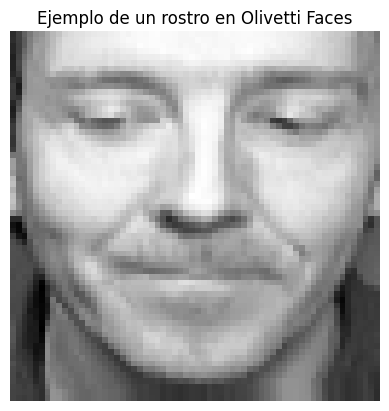

In [111]:
plt.imshow(images[25], cmap='gray')
plt.title("Ejemplo de un rostro en Olivetti Faces")
plt.axis('off')
plt.show()

(Utilice este espacio para describir el procedimiento, análisis y conclusiones)

#### 2.2. Genere una figura con una imágen de cada uno de los individuos

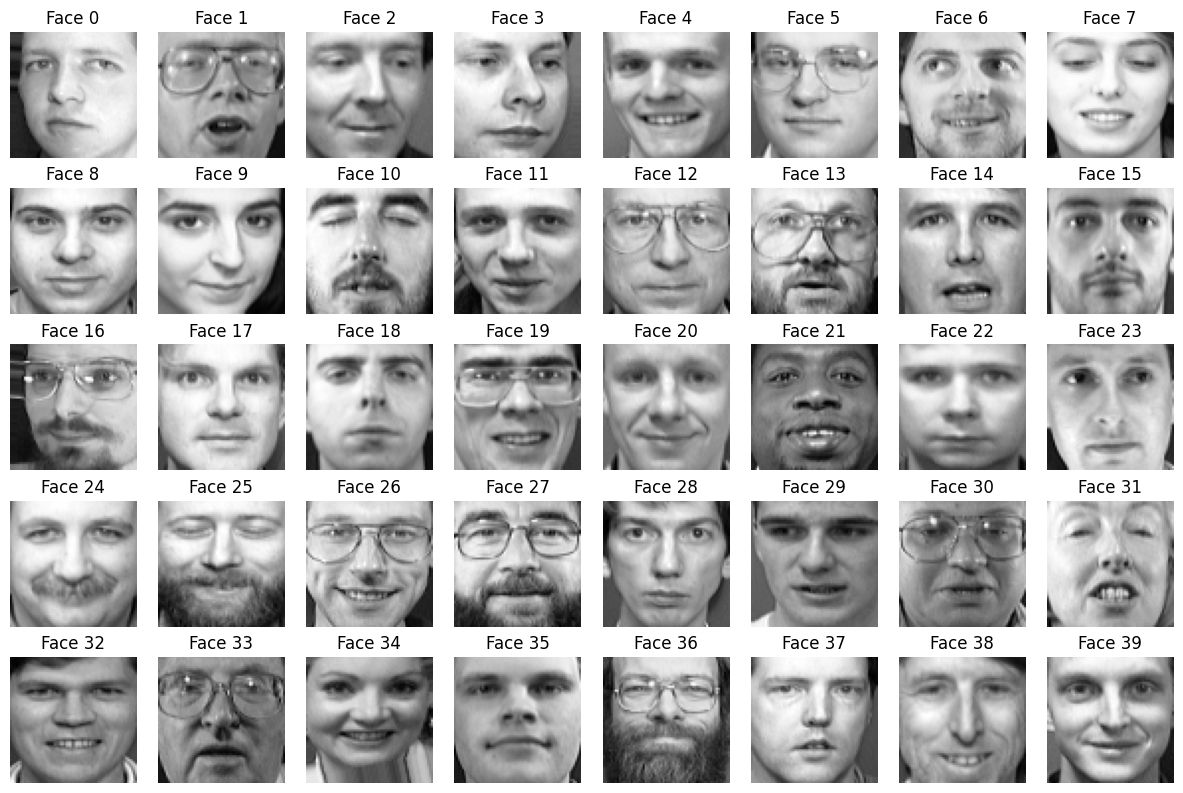

In [112]:
fig, axes = plt.subplots(5, 8, figsize=(12, 8))

for i, individual in enumerate(np.unique(targets)):
    ax = axes[i // 8, i % 8]
    ax.imshow(images[targets == individual][np.random.randint(0, 10)], cmap='gray')
    ax.set_title(f'Face {individual}')
    ax.axis('off')

plt.tight_layout()
plt.show()

(Utilice este espacio para describir el procedimiento, análisis y conclusiones)

#### 2.3. Transforme las imágenes en un data frame donde cada columna contiene los valores estandarizados del nivel de gris en la imagen y una columna con la etiqueta de cada imagen. 

In [113]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df = pd.DataFrame(X_scaled, columns=[f'pixel_{i}' for i in range(X_scaled.shape[1])])
df['label'] = targets

df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4087,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095,label
0,-0.499903,-0.351181,-0.302961,-0.395361,-0.137608,0.104953,0.213296,0.194895,0.171393,0.065267,...,1.663787,1.598077,1.621725,0.726428,-1.092090,-0.959562,-0.898275,-0.831520,-0.850457,0
1,0.301499,0.194640,0.185686,0.203914,0.213404,0.290404,0.361849,0.355027,0.311534,0.180529,...,-1.157252,-1.249632,-1.096954,-1.007794,-0.982782,-0.938375,-0.898275,-0.876585,-0.873362,0
2,-0.454109,-0.176519,0.079458,0.054095,0.169528,0.383129,0.361849,0.248272,0.255478,0.151713,...,-1.293754,-0.999033,-1.162729,-1.141196,-1.004644,-0.980749,-0.964354,-0.899118,-0.873362,0
3,-1.118128,-1.268161,-1.450221,-1.679522,-1.936544,-2.236356,-2.262576,-1.566562,-1.230019,-1.116164,...,1.481785,1.620859,1.753274,2.082678,2.143408,2.197309,2.295495,2.390682,2.379127,0
4,0.553368,0.587631,0.546860,0.546357,0.498601,0.568579,0.436125,0.435093,0.395618,0.382236,...,-1.134501,-1.021815,-0.965405,-0.874393,-0.851614,-0.811252,-0.766119,-0.763921,-0.758838,0


Estandarización de los valores de gris:

Se utiliza StandardScaler de sklearn para estandarizar los valores de gris en las imágenes. Esto asegura que cada característica (píxel) tenga una media de 0 y una desviación estándar de 1.
Creación del DataFrame:

Se crea un DataFrame de pandas con los datos estandarizados, donde cada columna corresponde a un píxel de la imagen.
Las columnas se nombran como pixel_0, pixel_1, etc., hasta pixel_4095.
Se agrega una columna label que contiene la etiqueta de cada imagen, que identifica al individuo correspondiente.
Mostrar el DataFrame:

Finalmente, se imprimen las primeras filas del DataFrame para verificar su estructura.

FALTAN CONCLUSIONES

### 3. Clasificando de forma no supervisada

En esta sección trataremos de clasificar las imágenes de los individuos de forma no supervisada. Para ello utilizaremos los algoritmos de k-medias y k-medoides. Dado que sabemos que el dataset consta de 40 personas diferentes, utilizaremos esta información para pedirle a los algoritmos que encuentren k=40 clusters y examinaremos su precisión.


#### 3.1. Implemente k-medias sobre los datos estandarizados en el punto anterior. Al implementar utilice  `random_state=123` y `n_init=10`. (Esto puede tomar mucho tiempo y requerir mucho RAM, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))

In [114]:
from sklearn.cluster import KMeans

n_clusters = 40
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=123)
kmeans.fit(df.drop(columns=['label']))

df['cluster_kmeans'] = kmeans.labels_

(Utilice este espacio para describir el procedimiento, análisis y conclusiones)

#### 3.2. Evalúe la precisión del algoritmo para agrupar las imágenes de los individuos. 

In [115]:
from sklearn.metrics import adjusted_rand_score

ari_score = adjusted_rand_score(df['label'], df['cluster_kmeans'])
print(f'Adjusted Rand Index (ARI) para K-Medias: {ari_score:.4f}')

Adjusted Rand Index (ARI) para K-Medias: 0.4685


(Utilice este espacio para describir el procedimiento, análisis y conclusiones)

#### 3.3. Usando PCA reduzca la dimensión de la matriz de predictores. Retenga el numero de componentes que explican el 95% de la varianza y vuelva a utilizar k-medias para clasificar las imágenes comentado si la precisión mejoró. 

In [116]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, svd_solver='full')
X_pca = pca.fit_transform(X_scaled)

n_components = X_pca.shape[1]
print(f"Número de componentes utilizados para explicar el 95% de la varianza: {n_components}")

kmeans_pca = KMeans(n_clusters=40, random_state=123, n_init=10)
kmeans_pca.fit(X_pca)

df['cluster_kmeans_pca'] = kmeans_pca.labels_

ari_kmeans_pca = adjusted_rand_score(df['label'], df['cluster_kmeans_pca'])
print(f'Adjusted Rand Index (ARI) para K-Medias con PCA: {ari_kmeans_pca:.4f}')

Número de componentes utilizados para explicar el 95% de la varianza: 123
Adjusted Rand Index (ARI) para K-Medias con PCA: 0.4421


(Utilice este espacio para describir el procedimiento, análisis y conclusiones)

#### 3.4. Utilice ahora el algoritmo por  K-medoides (use el mismo random state a los puntos anteriores), comente si mejoró la precisión total y para cada grupo de imágenes.

In [117]:
from sklearn_extra.cluster import KMedoids 

kmedoids_pca = KMedoids(n_clusters=40, metric='euclidean', random_state=123)
kmedoids_pca.fit(X_pca)

df['cluster_kmedoids_pca'] = kmedoids_pca.labels_
ari_kmedoids_pca = adjusted_rand_score(df['label'], df['cluster_kmedoids_pca'])

print(f'Adjusted Rand Index (ARI) para K-Medoides con PCA: {ari_kmedoids_pca:.4f}')

Adjusted Rand Index (ARI) para K-Medoides con PCA: 0.2389


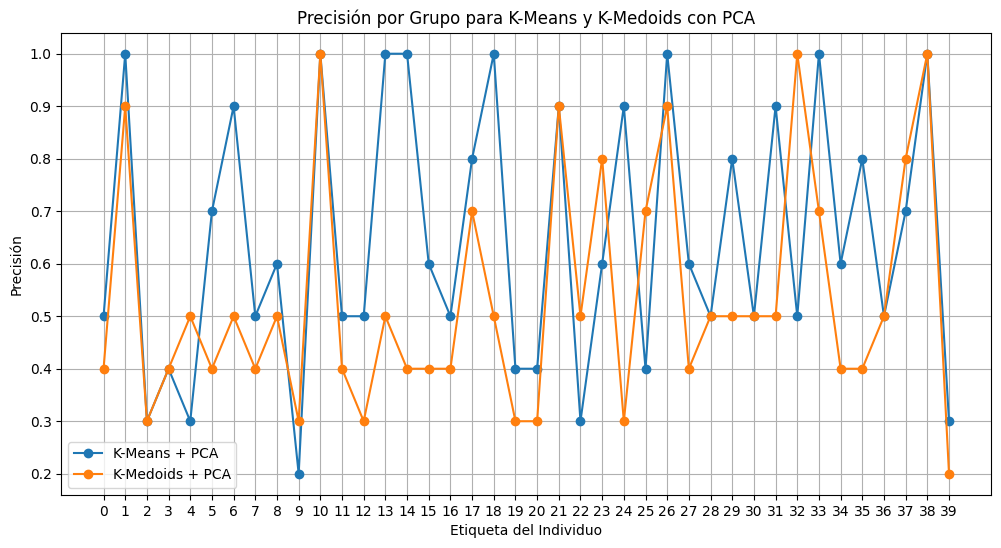

In [118]:
cluster_precision = pd.DataFrame({
    'label': df['label'],
    'kmeans_pca_cluster': df['cluster_kmeans_pca'],
    'kmedoids_pca_cluster': df['cluster_kmedoids_pca']
})

kmeans_group_precision = cluster_precision.groupby('label')['kmeans_pca_cluster'].apply(
    lambda x: (x.value_counts().max() / x.size)
)

kmedoids_group_precision = cluster_precision.groupby('label')['kmedoids_pca_cluster'].apply(
    lambda x: (x.value_counts().max() / x.size)
)

plt.figure(figsize=(12, 6))
labels = list(range(40))
plt.plot(labels, kmeans_group_precision, label='K-Means + PCA', marker='o')
plt.plot(labels, kmedoids_group_precision, label='K-Medoids + PCA', marker='o')
plt.title('Precisión por Grupo para K-Means y K-Medoids con PCA')
plt.xlabel('Etiqueta del Individuo')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.xticks(labels)
plt.show()


(Utilice este espacio para describir el procedimiento, análisis y conclusiones)

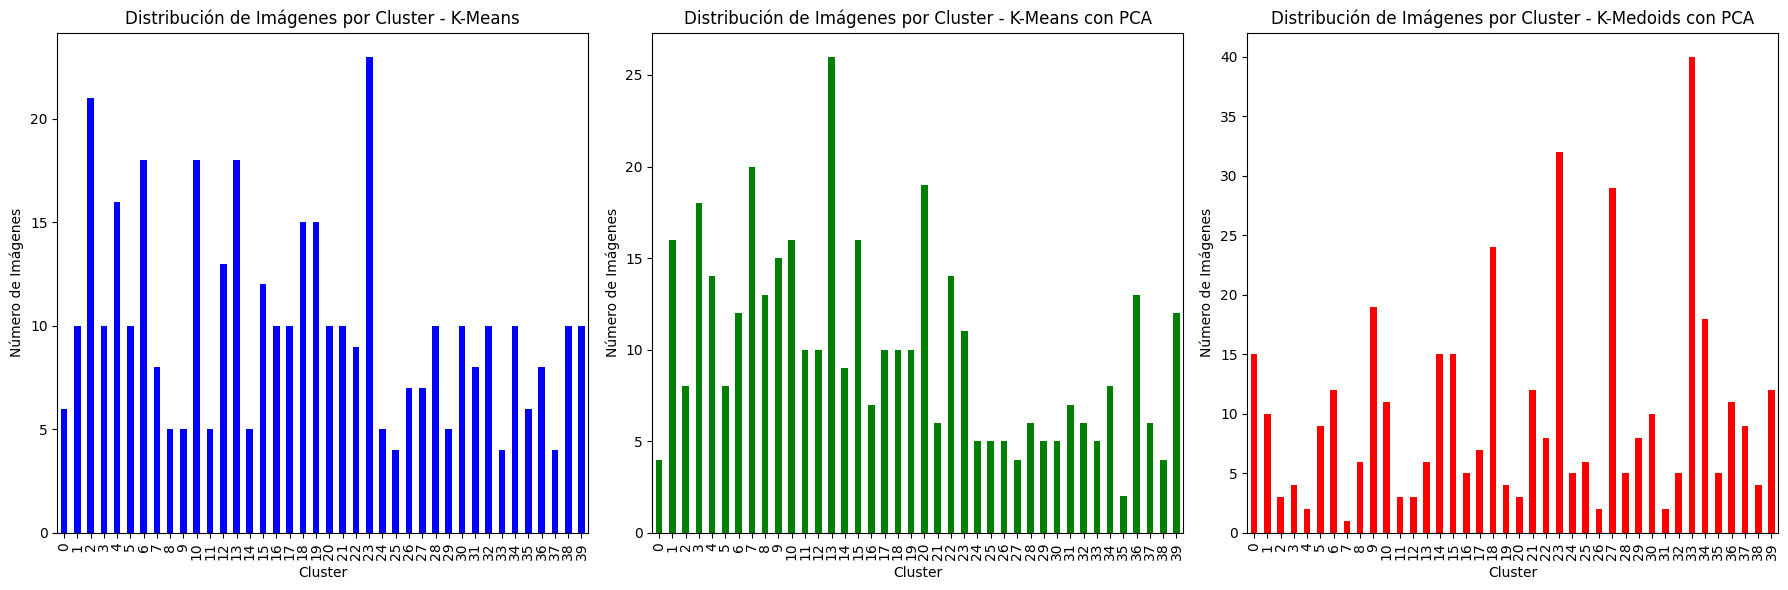

In [127]:
# Contar la cantidad de imágenes por cluster para cada método
kmeans_counts = df['cluster_kmeans'].value_counts().sort_index()
kmeans_pca_counts = df['cluster_kmeans_pca'].value_counts().sort_index()
kmedoids_pca_counts = df['cluster_kmedoids_pca'].value_counts().sort_index()

# Crear una figura para las tres distribuciones
plt.figure(figsize=(18, 6))

# Gráfico de la distribución de imágenes por cluster para K-Means
plt.subplot(1, 3, 1)
kmeans_counts.plot(kind='bar', color='blue')
plt.title('Distribución de Imágenes por Cluster - K-Means')
plt.xlabel('Cluster')
plt.ylabel('Número de Imágenes')

# Gráfico de la distribución de imágenes por cluster para K-Means con PCA
plt.subplot(1, 3, 2)
kmeans_pca_counts.plot(kind='bar', color='green')
plt.title('Distribución de Imágenes por Cluster - K-Means con PCA')
plt.xlabel('Cluster')
plt.ylabel('Número de Imágenes')

# Gráfico de la distribución de imágenes por cluster para K-Medoids con PCA
plt.subplot(1, 3, 3)
kmedoids_pca_counts.plot(kind='bar', color='red')
plt.title('Distribución de Imágenes por Cluster - K-Medoids con PCA')
plt.xlabel('Cluster')
plt.ylabel('Número de Imágenes')

plt.tight_layout()
plt.show()

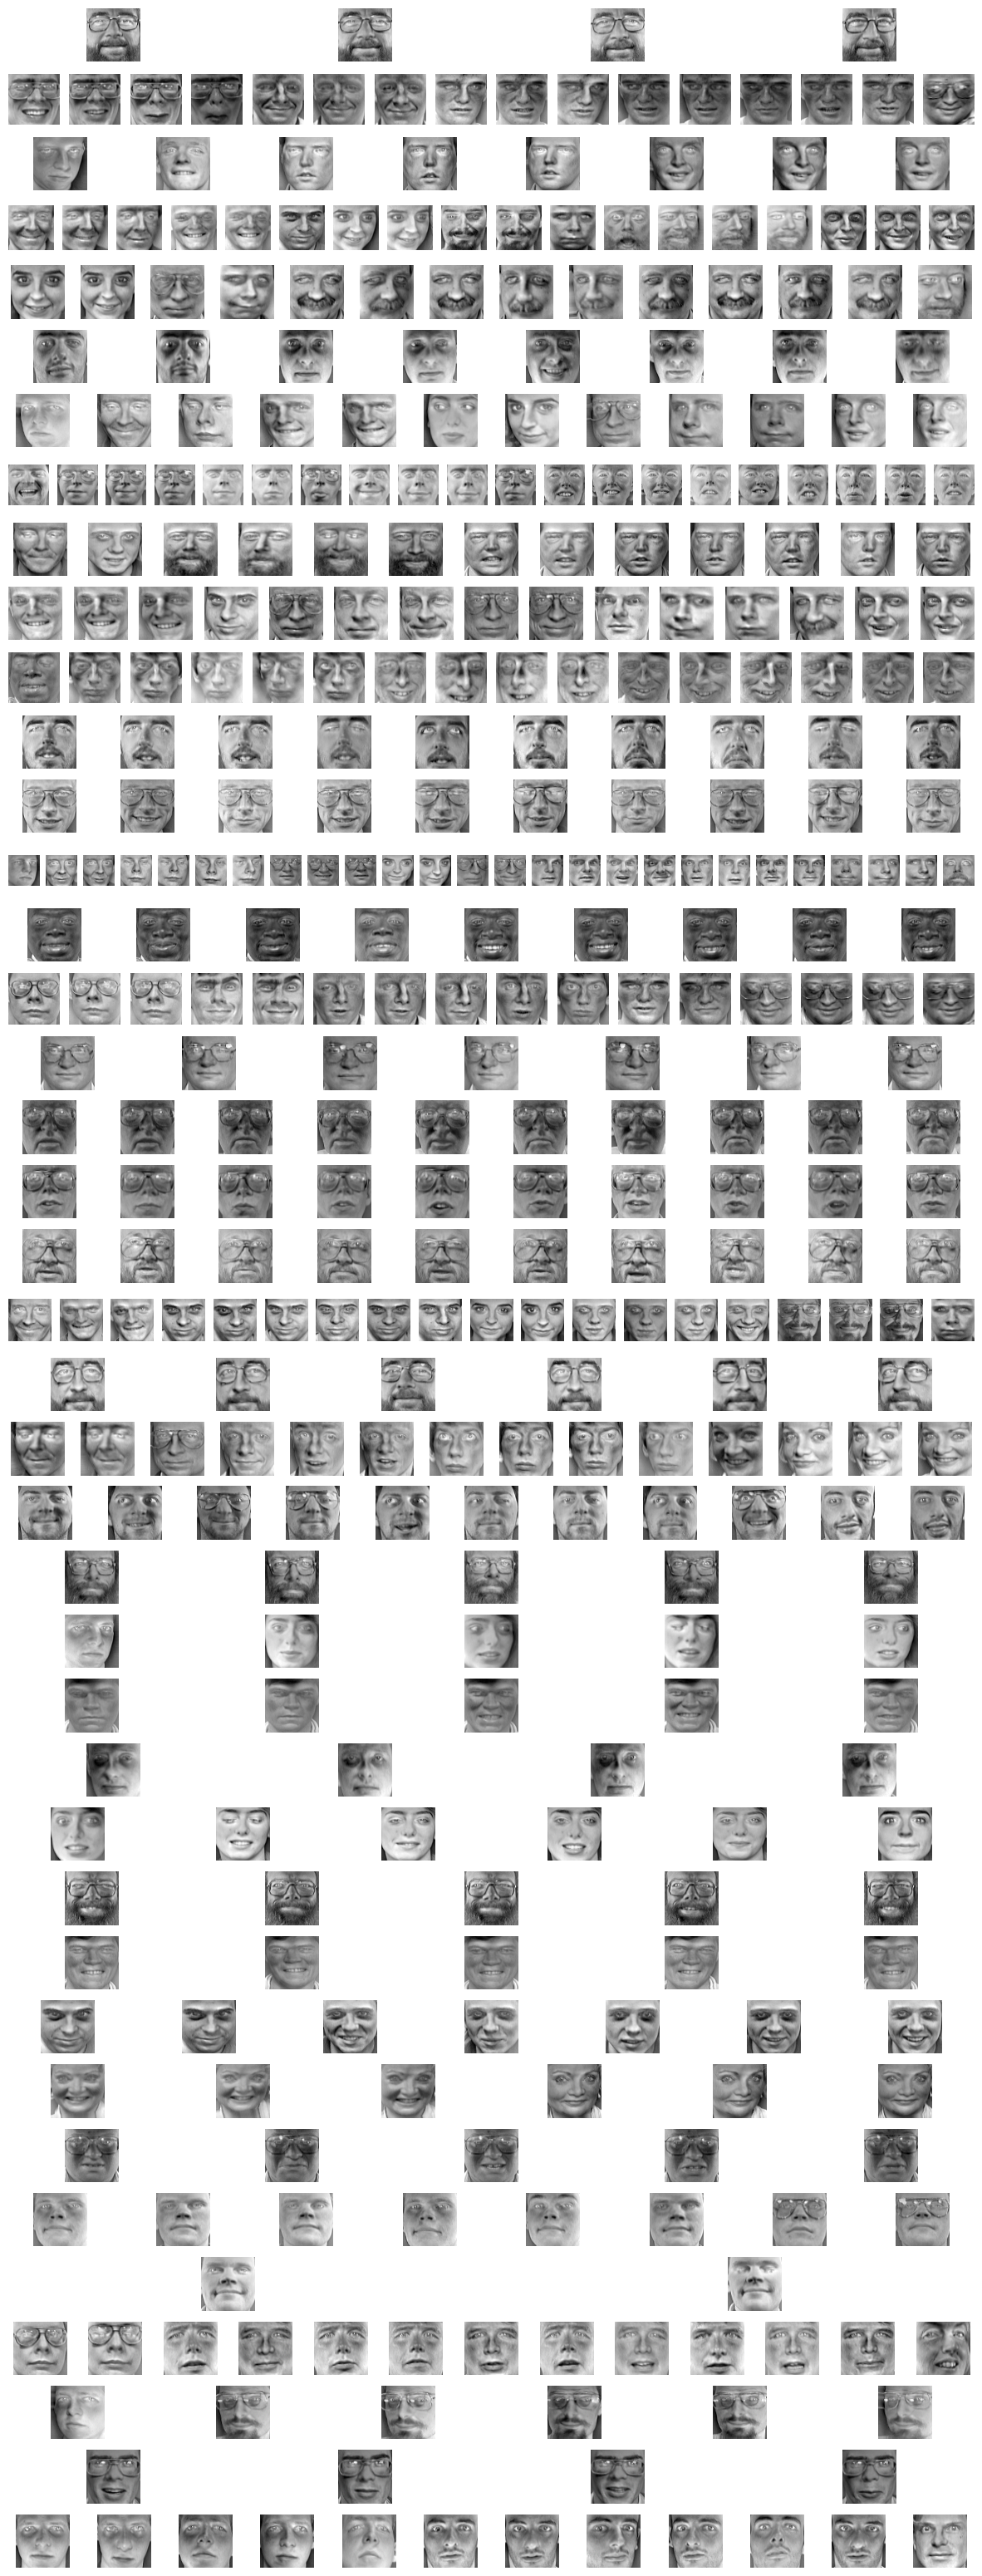

In [132]:
import matplotlib.pyplot as plt
import numpy as np


tipo_cluster = 'cluster_kmeans_pca' # 'cluster_kmeans', 'cluster_kmeans_pca', 'cluster_kmedoids_pca'

# Obtener los clusters únicos ordenados
clusters = sorted(df[tipo_cluster].unique())

# Configurar la figura
n_clusters = len(clusters)
plt.figure(figsize=(15, 1 * n_clusters))

for idx, cluster_id in enumerate(clusters):
    # Filtrar las imágenes que pertenecen al cluster actual
    filtered_images = df[df[tipo_cluster] == cluster_id].drop(columns=['label', 'cluster_kmeans', 'cluster_kmeans_pca', 'cluster_kmedoids_pca'])
    
    # Reconstruir las imágenes desde los valores de los píxeles
    images_filtered = filtered_images.values.reshape(-1, 64, 64)
    
    n_images = len(images_filtered)
    cols = n_images  # Número de columnas en la cuadrícula (una columna por imagen)
    
    # Graficar cada imagen en la fila correspondiente al cluster actual
    for i in range(n_images):
        plt.subplot(n_clusters, cols, idx * cols + i + 1)
        plt.imshow(images_filtered[i], cmap='gray')
        plt.axis('off')
    
    # Añadir un título para cada fila
    plt.subplot(n_clusters, cols, idx * cols + 1)
    plt.ylabel(f'Cluster {cluster_id}', rotation=0, labelpad=50, fontsize=12, va='center')

# plt.tight_layout()
plt.show()


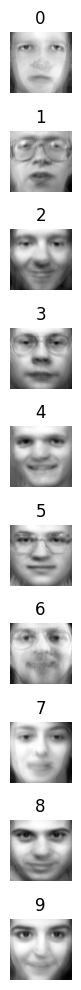

In [64]:
# Definir el número de personas a mostrar
n_persons = 10

# Crear la figura
plt.figure(figsize=(15, 1 * n_persons))

for person_id in range(n_persons):
    person_images = images[targets == person_id]
    average_face = person_images.mean(axis=0)
    
    # # Graficar todas las imágenes de la persona
    # for i, img in enumerate(person_images):
    #     plt.subplot(n_persons, person_images.shape[0] + 1, person_id * (person_images.shape[0] + 1) + i + 1)
    #     plt.imshow(img, cmap='gray')
    #     plt.axis('off')
    #     if i == 0:
    #         plt.ylabel(f'Persona {person_id}', fontsize=12)
    
    # Graficar el rostro promedio al final de la fila
    plt.subplot(n_persons, person_images.shape[0] + 1, (person_id + 1) * (person_images.shape[0] + 1))
    plt.imshow(average_face, cmap='gray')
    plt.axis('off')
    plt.title(f'{person_id}', fontsize=12)

plt.tight_layout()
plt.show()

### 4. Número de clusters óptimo

En el punto anteriores utilizamos nuestro conocimiento previo sobre los datos para elegir el número de clusters. En este punto, verifique si 40 es realmente el número de cluster que usted elegiría según los criterios estudiados en los cuadernos teóricos. Discuta los resultados obtenidos.

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


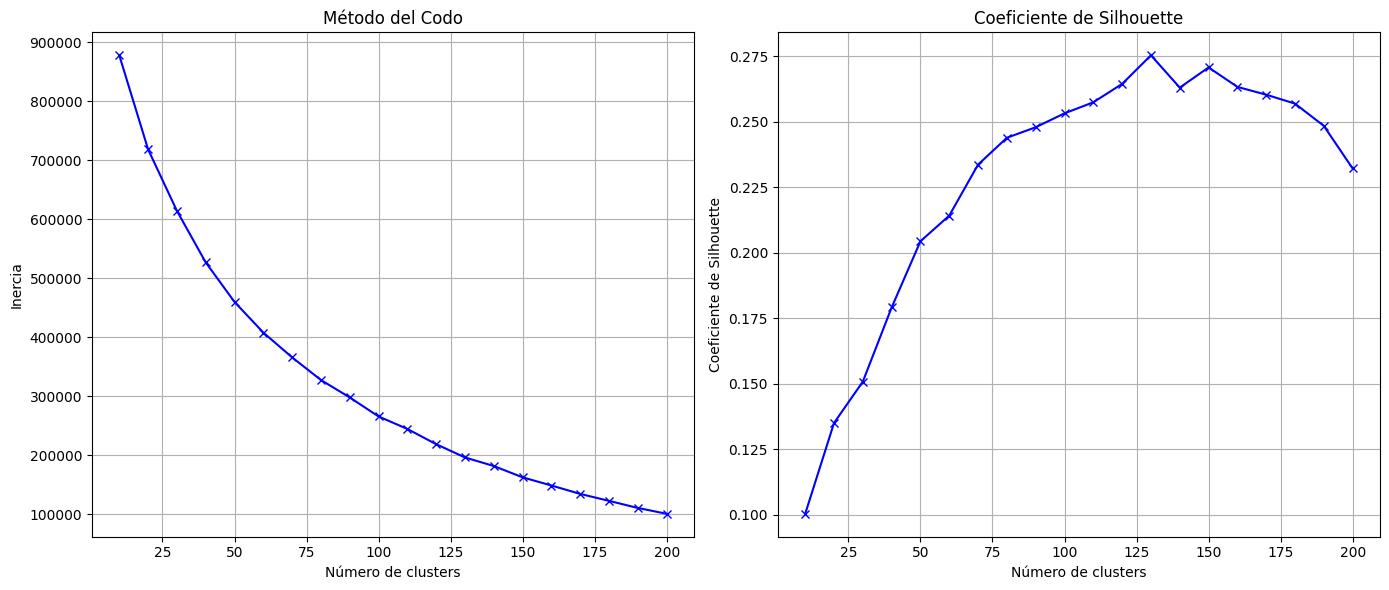

In [39]:
from sklearn.metrics import silhouette_score

n_clusters = list(range(10, 201, 10))

print(n_clusters)

inertia = []
silhouette_avg = []

for n in n_clusters:
    
    kmeans = KMeans(n_clusters=n, random_state=123, n_init=10)
    kmeans.fit(X_pca)
    
    inertia.append(kmeans.inertia_)
    silhouette_avg.append(silhouette_score(X_pca, kmeans.labels_))
    

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(n_clusters, inertia, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Coeficiente de Silhouette')
plt.title('Coeficiente de Silhouette')
plt.grid(True)

plt.tight_layout()
plt.show()

In [28]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones)